<a href="https://colab.research.google.com/github/j23-cs167/project-2-annikahurd/blob/main/HurdProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
##Name:

Proposed Points (out of 25):

# 1. Problem
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

Every year, the World Happiness Report collects data from citizens in 155 countries. They are asked to rate their happiness on a scale of 1-10. Then, the World Happiness Report collects data regarding the GDP, level of corruption, and other metrics for each country to evaluate the most important contributors to happiness. I obtained the data from Kaggle, but it was originally sourced from the World Happiness Report. I am trying to determine the most important factors that contribute to percieved happiness. I will be predicting a nation's happiness score based on economic and governmental statistics. 

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

To clean my data, first, I removed the features that I was not using in my experiment. These included columns that already contained elements of data analysis from the owner of the data set on Kaggle. 

After I winnowed my data into the features I wanted, I then needed to check and make sure that there wasn't any missing values. There were no missing values, so I am able to proceed without removing any data. 

Since I am predicting a numeric value using regression, I need to use a one hot encoding to transform my only categorical variable. After using the `get_dummies` feature in `pandas`, my data is ready to be used. 

Next, I noticed that there was quite a range between the values in different features. Some range from 0-1 while others are 70+. This makes normalization of the data a necessity. Otherwise the data could be skewed towards one feature. 

Finally, I separated the data into training data, testing data, training solutions, and testing solutions. Now, the data is able to be used. 


In [3]:
# Mount your drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.model_selection import train_test_split
path = '/content/drive/MyDrive/CS167/Datasets/2020data.csv'
happiness = pd.read_csv(path)
happiness.head()

#Now I will check for missing data:

happiness.isna().any()

#There is not any missing data, but some of the columns are not relevant. 
#Country name, SE of score, upperwhisker, lowerwhisker, ladder score in dystopia, and the explained by columns will all be dropped. 
#The 'explained by' columns are the kaggle owner's own analysis so I am goung to delete these columns. 

data = happiness[['Regional indicator','Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
data.head()

#This is a regression model, so we must use a one hot encoding to utilize region as a regression variable. 
data_dummies = pd.get_dummies(data, columns=['Regional indicator'])

#Now I am going to split the data into the training data and testing data
target = "Ladder score"
predictors = data_dummies.columns.drop(target)
train_data, test_data, train_sln, test_sln = \
        train_test_split(data_dummies[predictors], data_dummies[target], test_size = 0.2, random_state=41)


#Looking at the data, we can see that it needs to be normalized. Healthy life expectancy is in the 70s, but Generosity is less than 1. 
#This could result in an over emphasis on Healthy life expectancy, so it needs to be normalized. 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_norm = scaler.transform(train_data)
test_data_norm = scaler.transform(test_data)


Mounted at /content/drive


# 3. Research

Put your code and your experiments here.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.dummy import DummyRegressor
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [5]:
dummy_data = DummyRegressor() #make random guesses #look in the api for other strategies
dummy_data.fit(train_data_norm, train_sln)
preds = dummy_data.predict(test_data_norm)

print("r^2:", r2_score(test_sln, preds))

r^2: -0.025538134548339864


The $R^2$ score for a naive strategy is -0.026, which means that our $R^2$ scores for our models should beat this score if they are affective. 

[0.624159413143184, 0.6251017769862706, 0.6338457944810783, 0.6581170157487661, 0.6570187424518078, 0.6532110414423499, 0.6397122191020292, 0.6416161279030177, 0.6215472758546021, 0.6318698142144926, 0.6263403950136308, 0.606007510913643, 0.6302297269592478, 0.6416146776532152, 0.6387692722294029, 0.6528979128173337, 0.6599005029801361, 0.6648447901275373, 0.6717677766413355, 0.6792350412947457, 0.6852649936944423, 0.6988249700578395, 0.7055745764260166, 0.7090114740327594, 0.7152672814404419, 0.7224807942276861, 0.7141120799493115, 0.7138245449911529, 0.7185223172683041, 0.7224510840200797, 0.724499619724557, 0.7234605186261024, 0.7204036352800223, 0.716810150683986, 0.7078242038867759, 0.6976151961505856, 0.6969141667948829, 0.6867237698934499, 0.6750029636200461, 0.6661947399605805, 0.6548637247940183, 0.6494891392923511, 0.6430558218985933, 0.6374645170368649, 0.6360600944731398, 0.6266293827258698, 0.6239303947180873, 0.6140461627544904, 0.6018306742614369, 0.5985684601267975, 0.5

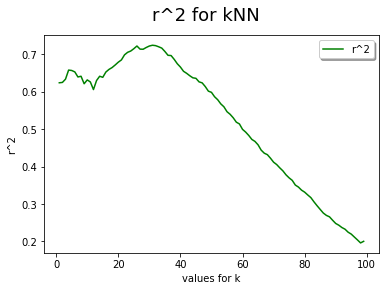

30

In [6]:
# code goes here... don't forget to include graphs. Professor Moore loves graphs.

kNN_r2 = []
for i in range (1, 100):
  knn= neighbors.KNeighborsRegressor(n_neighbors=i)
  knn.fit(train_data_norm, train_sln)
  knn_preds= knn.predict(test_data_norm)
  knn_r2 = metrics.r2_score(test_sln, knn_preds)
  kNN_r2.append(knn_r2)
print(kNN_r2)

import matplotlib.pyplot as plt
%matplotlib inline  

xvals = range(1, 100)
plt.suptitle('r^2 for kNN', fontsize=18)
plt.xlabel('values for k')
plt.ylabel('r^2')
plt.plot(xvals, kNN_r2, 'g-', label='r^2')
plt.legend(loc='upper right', shadow=True)
#plt.axis([1, number_of_points, 10,35])
plt.show()

max(kNN_r2)

kNN_r2.index(max(kNN_r2))

The optimal value for k is near 30 with an $R^2$ of roughly .724499 with k = 30

[0.624159413143184, 0.6302506317621269, 0.6403333462565888, 0.6601849060482734, 0.6676906453203537, 0.6677456614995518, 0.6627790588491382, 0.6632117755547285, 0.6504768735900955, 0.6558988030980342, 0.6506469002550379, 0.6391071483269883, 0.6554818530380722, 0.6633069866589115, 0.6611653377332032, 0.6698731408396976, 0.6755740264994894, 0.6804792276487812, 0.686049601776052, 0.6920896499937805, 0.6954163717938388, 0.7052413206258483, 0.7110892331241125, 0.7146731237547639, 0.719813113196456, 0.7248939992969259, 0.7212164678246331, 0.7202346621155111, 0.7230272989664317, 0.7262692796279185, 0.7289184273624427, 0.7297972936395207, 0.7282236170843779, 0.72812521539746, 0.7245990467830544, 0.7201237830180078, 0.7214826692070504, 0.7167133902111873, 0.7117726660027022, 0.7075059861647913, 0.7026504651555576, 0.7003176539777132, 0.6980446079979615, 0.6955648724482915, 0.6946304235323008, 0.6895745164162488, 0.6877712501038933, 0.6832165632332052, 0.6781425939411942, 0.6766048985345274, 0.67

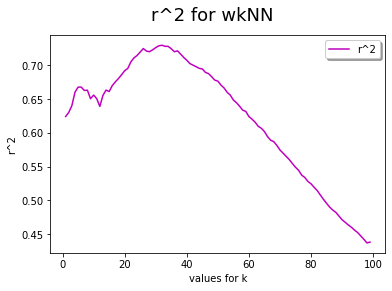

31

In [7]:
wkNN_r2 = []
for i in range (1, 100):
  wknn= neighbors.KNeighborsRegressor(n_neighbors=i, weights = 'distance')
  wknn.fit(train_data_norm, train_sln)
  wknn_preds= wknn.predict(test_data_norm)
  wknn_r2 = metrics.r2_score(test_sln, wknn_preds)
  wkNN_r2.append(wknn_r2)
print(wkNN_r2)

import matplotlib.pyplot as plt
%matplotlib inline  

xvals = range(1, 100)
plt.suptitle('r^2 for wkNN', fontsize=18)
plt.xlabel('values for k')
plt.ylabel('r^2')
plt.plot(xvals, wkNN_r2, 'm-', label='r^2')
plt.legend(loc='upper right', shadow=True)
#plt.axis([1, number_of_points, 10,35])
plt.show()

max(wkNN_r2)

wkNN_r2.index(max(wkNN_r2))

The optimal value for $R^2$ for the wkNN is .72979 with k = 31

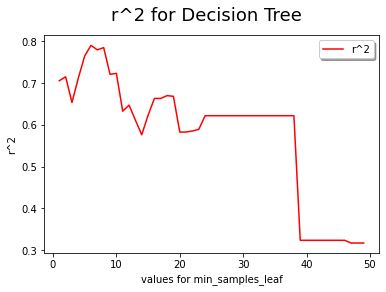

0.7905499067517983


5

In [8]:
dt_list = []

for i in range (1, 50):
  dtree = tree.DecisionTreeRegressor(min_samples_leaf = i)
  dtree.fit(train_data_norm, train_sln)

  dpreds= dtree.predict(test_data_norm)
  dr2 = r2_score(test_sln, dpreds)
  dt_list.append(dr2)

xvals = range(1, 50)
plt.suptitle('r^2 for Decision Tree', fontsize=18)
plt.xlabel('values for min_samples_leaf')
plt.ylabel('r^2')
plt.plot(xvals, dt_list, 'r-', label='r^2')
plt.legend(loc='upper right', shadow=True)
#plt.axis([1, number_of_points, 10,35])
plt.show()

print(max(dt_list))

dt_list.index(max(dt_list))


The decision tree model has a maximum $R^2$ of .79567 with min_samples_leaf = 1. However, this min_samples_leaf is the minimum samples required to start a new node. With this value = 1, it is likely that the data is overfitting. So, I would optimize this paramater at min_samples_leaf = 8 with an accuracy slightly below the optimal. 

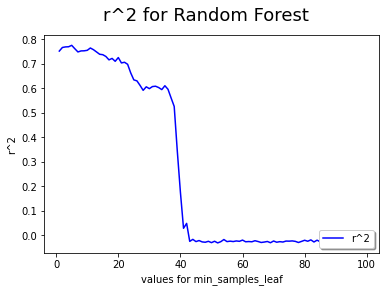

4

In [9]:
from sklearn.ensemble import RandomForestRegressor
rf_list = []

for i in range (1, 100):
  n_forest = RandomForestRegressor(min_samples_leaf = i)
  n_forest.fit(train_data_norm, train_sln)
  n_forest_preds = n_forest.predict(test_data_norm)
  n_r2=metrics.r2_score(test_sln, n_forest_preds)
  rf_list.append(n_r2)


xvals = range(1, 100)
plt.suptitle('r^2 for Random Forest', fontsize=18)
plt.xlabel('values for min_samples_leaf')
plt.ylabel('r^2')
plt.plot(xvals, rf_list, 'b-', label='r^2')
plt.legend(loc='lower right', shadow=True)
#plt.axis([1, number_of_points, 10,35])
plt.show()

rf_list.index(max(rf_list))

The maximum $R^2$ for this model is .77396 at min_samples_leaf = 3. Since there is a steep drop off at this point, this indicates that is it the optimal value and not overfitting. 

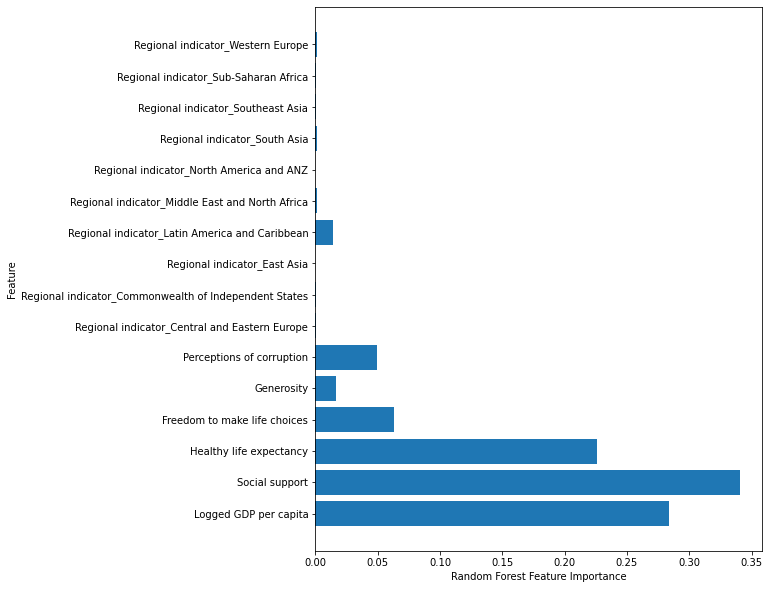

In [10]:
index = range(len(predictors)) #creates a list of numbers the right size to use as the index
n_forest_3 = RandomForestRegressor(min_samples_leaf = 3)
n_forest_3.fit(train_data_norm, train_sln)


plt.figure(figsize=(8,10)) #making the table a bit bigger so the text is readable
plt.barh(index,n_forest_3.feature_importances_,height=0.8) #horizontal bar chart
plt.ylabel('Feature')
plt.yticks(index,predictors) #put the feature names at the y tick marks
plt.xlabel("Random Forest Feature Importance")
plt.show()

Logged GDP per capita, social support, and healthy life expectancy are all dominant features. I think that this data set is a good candidate for PCA as a result. 

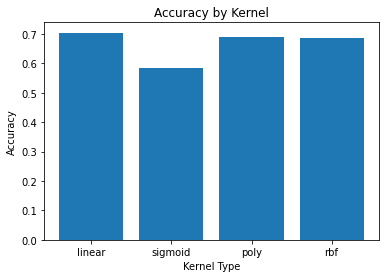

[0.7044893781797685, 0.5847465193605801, 0.6907107994371646, 0.686672667330324]


In [11]:
from sklearn.svm import SVR

tune_features = ['linear', 'sigmoid', 'poly', 'rbf']
tune_r2 = []

for i in tune_features:
  clf_tune = SVR(kernel = i)
  clf_tune.fit(train_data_norm,train_sln)
  predictions_tune = clf_tune.predict(test_data_norm)
  r2_tune = r2_score(test_sln, predictions_tune)
  tune_r2.append(r2_tune)

import matplotlib.pyplot as plt

x_axis = tune_features
y_axis = tune_r2

plt.bar(x_axis, y_axis)
plt.title('Accuracy by Kernel')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.show()

print(tune_r2)

The most accurate kernel type for the SVM was linear with an $R^2$ score of .704489

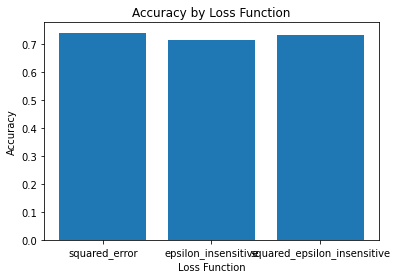

[0.7398139427527666, 0.7129153307688703, 0.7315348255562237]


In [12]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()

tune_features_sgd = tune_features = ['squared_error','epsilon_insensitive', 'squared_epsilon_insensitive']
tune_r2_sgd = []

for i in tune_features_sgd:
  tune_sgd = SGDRegressor(loss = i)
  tune_sgd.fit(train_data_norm,train_sln)
  predictions_tune_sgd = tune_sgd.predict(test_data_norm)
  r2_sgd_tune = r2_score(test_sln, predictions_tune_sgd)
  tune_r2_sgd.append(r2_sgd_tune)

import matplotlib.pyplot as plt

x_axis = tune_features_sgd
y_axis = tune_r2_sgd

plt.bar(x_axis, y_axis)
plt.title('Accuracy by Loss Function')
plt.xlabel('Loss Function')
plt.ylabel('Accuracy')
plt.show()

print(tune_r2_sgd)

The optimized $R^2$ value for SGD was .7385 with the default squared_error loss function

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (125) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (126) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (127) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (128) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

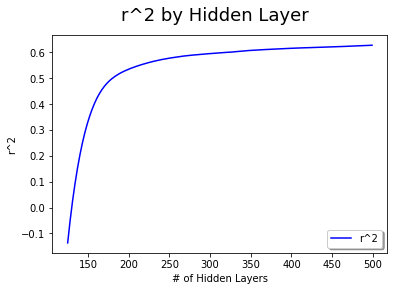

In [21]:
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import matplotlib.pyplot as plt


mlp_list = []

for i in range (125, 500):
  mlp = MLPRegressor(random_state=0,hidden_layer_sizes = (100,), max_iter = i)
  mlp.fit(train_data_norm,train_sln)
  predictions_mlp = mlp.predict(test_data_norm)
  r2_mlp = r2_score(test_sln, predictions_mlp)
  mlp_list.append(r2_mlp)


xvals = range(125, 500)
plt.suptitle('r^2 by Hidden Layer', fontsize=18)
plt.xlabel('# of Hidden Layers')
plt.ylabel('r^2')
plt.plot(xvals, mlp_list, 'b-', label='r^2')
plt.legend(loc='lower right', shadow=True)
#plt.axis([1, number_of_points, 10,35])
plt.show()


In [14]:
from sklearn.decomposition import PCA

extractor = PCA(n_components=4, whiten=True)
extractor.fit(train_data_norm)
test_transformed = extractor.transform(test_data_norm)
train_transformed = extractor.transform(train_data_norm)

I am choosing to run a PCA on all of the different algorithms. After looking at the key features chart, several seemed to be very important, while others were not. 

[0.6156956624847331, 0.6446210952829723, 0.6480896433496588, 0.632376638531747, 0.6250411052806837, 0.6186700281604733, 0.6372969665335115, 0.6504918373418858, 0.6543369202172821, 0.6477556238691955, 0.6571854444394197, 0.6619914573454726, 0.6484501610034216, 0.6434847859524475, 0.6353745989199691, 0.6240158648280528, 0.639606746374409, 0.6352733853561896, 0.6371470470707832, 0.6364343777577959, 0.6407389349806005, 0.6380687646115248, 0.6373687775029282, 0.6465249805426041, 0.6495989784993618, 0.6594991019607451, 0.6477963507821551, 0.6545647812824288, 0.6559093013346923, 0.6542869319323186, 0.6516680283288974, 0.6394053169565761, 0.6311040967985418, 0.6245312105834292, 0.6176964888082643, 0.6215373346293233, 0.6110822732267185, 0.6065510820978958, 0.5955833874358072, 0.5879972076891886, 0.5872148624017317, 0.5825208783007085, 0.5853526883525562, 0.5750878244107862, 0.5617654235483784, 0.5544827086222359, 0.5476382600742459, 0.5355979342320812, 0.5252642760313184, 0.5169308623256277, 0

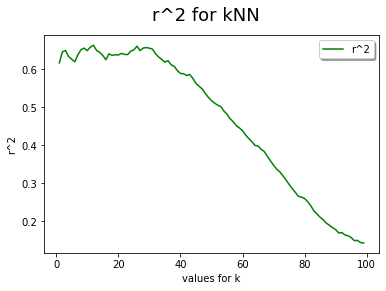

0.6619914573454726


11

In [17]:
kNN_r2_pca = []
for i in range (1, 100):
  knn= neighbors.KNeighborsRegressor(n_neighbors=i)
  knn.fit(train_transformed, train_sln)
  knn_preds= knn.predict(test_transformed)
  knn_r2 = metrics.r2_score(test_sln, knn_preds)
  kNN_r2_pca.append(knn_r2)
print(kNN_r2_pca)

import matplotlib.pyplot as plt
%matplotlib inline  

xvals = range(1, 100)
plt.suptitle('r^2 for kNN', fontsize=18)
plt.xlabel('values for k')
plt.ylabel('r^2')
plt.plot(xvals, kNN_r2_pca, 'g-', label='r^2')
plt.legend(loc='upper right', shadow=True)
#plt.axis([1, number_of_points, 10,35])
plt.show()

print(max(kNN_r2_pca))

kNN_r2_pca.index(max(kNN_r2_pca))

The PCA has worsened the $R^2$ score of the kNN with a score of .662 where k =11. 

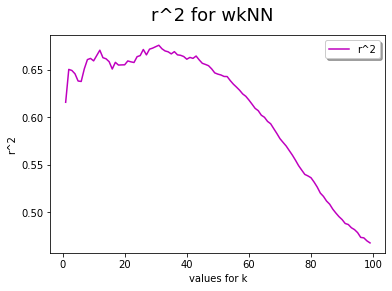

0.6758660021723769


30

In [18]:
wkNN_r2_pca = []
for i in range (1, 100):
  wknn= neighbors.KNeighborsRegressor(n_neighbors=i, weights = 'distance')
  wknn.fit(train_transformed, train_sln)
  wknn_preds= wknn.predict(test_transformed)
  wknn_r2 = metrics.r2_score(test_sln, wknn_preds)
  wkNN_r2_pca.append(wknn_r2)


import matplotlib.pyplot as plt
%matplotlib inline  

xvals = range(1, 100)
plt.suptitle('r^2 for wkNN', fontsize=18)
plt.xlabel('values for k')
plt.ylabel('r^2')
plt.plot(xvals, wkNN_r2_pca, 'm-', label='r^2')
plt.legend(loc='upper right', shadow=True)
#plt.axis([1, number_of_points, 10,35])
plt.show()

print(max(wkNN_r2_pca))

wkNN_r2_pca.index(max(wkNN_r2_pca))

The PCA has also worsened the $R^2$ score of the wKNN. It's maximum $R^2$ is .676 at k = 30

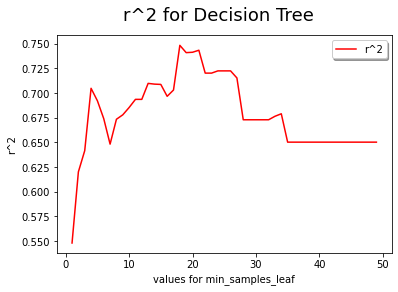

0.7483116689410956


17

In [26]:
dt_list_pca = []

for i in range (1, 50):
  dtree = tree.DecisionTreeRegressor(min_samples_leaf = i)
  dtree.fit(train_transformed, train_sln)

  dpreds= dtree.predict(test_transformed)
  dr2 = r2_score(test_sln, dpreds)
  dt_list_pca.append(dr2)

xvals = range(1, 50)
plt.suptitle('r^2 for Decision Tree', fontsize=18)
plt.xlabel('values for min_samples_leaf')
plt.ylabel('r^2')
plt.plot(xvals, dt_list_pca, 'r-', label='r^2')
plt.legend(loc='upper right', shadow=True)
#plt.axis([1, number_of_points, 10,35])
plt.show()

print(max(dt_list_pca))

dt_list_pca.index(max(dt_list_pca))


The decision tree's maximum $R^2$ valus is .748 with min_samples_leaf of 17. This is slightly worse than the analysis without PCA. 

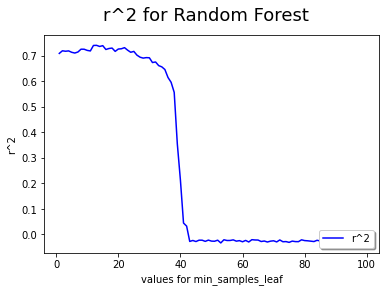

0.741259206634865


12

In [23]:
rf_list_pca = []

for i in range (1, 100):
  n_forest = RandomForestRegressor(min_samples_leaf = i)
  n_forest.fit(train_transformed, train_sln)
  n_forest_preds = n_forest.predict(test_transformed)
  n_r2=metrics.r2_score(test_sln, n_forest_preds)
  rf_list_pca.append(n_r2)


xvals = range(1, 100)
plt.suptitle('r^2 for Random Forest', fontsize=18)
plt.xlabel('values for min_samples_leaf')
plt.ylabel('r^2')
plt.plot(xvals, rf_list_pca, 'b-', label='r^2')
plt.legend(loc='lower right', shadow=True)
#plt.axis([1, number_of_points, 10,35])
plt.show()

print(max(rf_list_pca))
rf_list_pca.index(max(rf_list_pca))

The random forest has a max $R^2$ score of .74126 with min_samples_leaf of 12. Even with PCA, the $R^2$ begins to decline around 40. 

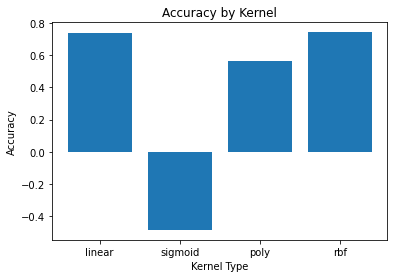

[0.741040434116524, -0.48550996020325754, 0.5666618990589232, 0.7426501100682337]


In [24]:
tune_features = ['linear', 'sigmoid', 'poly', 'rbf']
tune_r2_pca = []

for i in tune_features:
  clf_tune = SVR(kernel = i)
  clf_tune.fit(train_transformed,train_sln)
  predictions_tune = clf_tune.predict(test_transformed)
  r2_tune = r2_score(test_sln, predictions_tune)
  tune_r2_pca.append(r2_tune)

import matplotlib.pyplot as plt

x_axis = tune_features
y_axis = tune_r2_pca

plt.bar(x_axis, y_axis)
plt.title('Accuracy by Kernel')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.show()

print(tune_r2_pca)

Interestingly, the PCA greatly worsened the $R^2$ or the sygmoid kernel, but improved the linear and rbf kernel. 

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (125) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (126) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (127) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (128) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

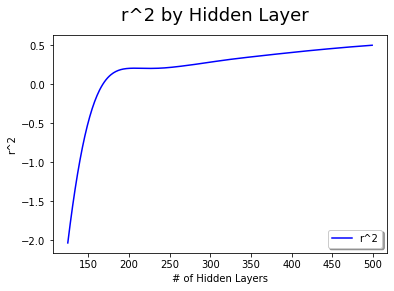

In [25]:
mlp_list_pca = []

for i in range (125, 500):
  mlp = MLPRegressor(random_state=0,hidden_layer_sizes = (100,), max_iter = i)
  mlp.fit(train_transformed,train_sln)
  predictions_mlp = mlp.predict(test_transformed)
  r2_mlp = r2_score(test_sln, predictions_mlp)
  mlp_list_pca.append(r2_mlp)


xvals = range(125, 500)
plt.suptitle('r^2 by Hidden Layer', fontsize=18)
plt.xlabel('# of Hidden Layers')
plt.ylabel('r^2')
plt.plot(xvals, mlp_list_pca, 'b-', label='r^2')
plt.legend(loc='lower right', shadow=True)
#plt.axis([1, number_of_points, 10,35])
plt.show()

While the $R^2$ score continues to increase as # of Hidden Layers increases just like the standard mlp, the mlp with PCA starts at a much lower $R^2$ and does not reach above .50 with 500 layers. 

#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

Overall, I was able to predict world happiness scores using machine learning. The models I used produced an $R^2$ score of near .70. The model that performed the best was the decision tree, which had an $R^2$ score of .79 with 5 as the min_samples_leaf. 

I implemented PCA to each of the models that I had experimented with, and the $R^2$ score was unable to beat the .79 from the decision tree. This was very interesting to me, since the key features graph from the Random Forest analysis indicated that there were several features that heavily influenced the prediction. Because of this, I assumed that running a PCA would help out models to become more accurate, since PCA isolates key features. However, this was not the case, and several models performed worse (specifically the decision tree, random forest, and mlp) using the PCA data. This is likely because while some features were incredibly important, there were others (such as region and government corruption) that also played a less pronounced role. When looking at the key features chart, all of the features do have a measurable impact. I suspect that this is why the PCA proved to not be useful; it eliminated features that did have an impact on the final prediction. 

Overall, my best models were the decision tree and random forest. I think this is because these models still work when features have a large impact, but still factor all features into the final prediction. The other models I used did not perform poorly, but they were not as accurate as these models. 

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

The biggest challenge that I encountered was keeping my goal of a regression analysis in mind. At first, I tried to clean my data without using a one hot encoding. I was too focused on cleaning the data quickly so I could run the models that I forgot that I needed to process the data, not just check for missing values. After I replaced the 'region' feature with a one hot encoding, I thought I was in the clear. However, some of the code I copy/pasted from previous notebooks was set up for a classification problem. But, instead of realizing this right away, I ended up searching in the API for the reason my code wouldn't run. This happened specifically with the MLP. The API was very useful as I could see that there were other tabs labeled "MLPRegressor", so I knew immediately what I had done wrong. 

Another challenge that I ran into was just printing out the graphs and moving on to the next model without taking a pause to analyze the graphs. This made my code hard to read, and difficult to go back to when I wanted to draw conclusions. So, for the PCA models, I made sure to analyze each step after I had completed it. 